# Spotify music recommendation using KNN

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

sns.set()
pd.options.mode.chained_assignment = None 


In [4]:
data = pd.read_csv("spotify.csv")
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


[Text(0.5, 0, 'acousticness'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'duration_ms'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'instrumentalness'),
 Text(5.5, 0, 'liveness'),
 Text(6.5, 0, 'loudness'),
 Text(7.5, 0, 'popularity'),
 Text(8.5, 0, 'speechiness'),
 Text(9.5, 0, 'tempo'),
 Text(10.5, 0, 'valence')]

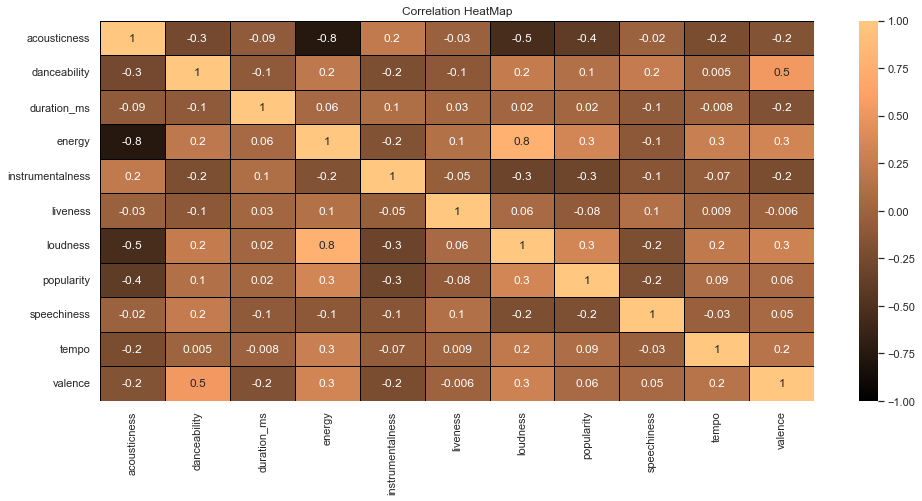

In [5]:
corr_df=data.drop(["key","mode","year","explicit"],axis=1).corr(method="pearson")
plt.figure(figsize=(16,7))
heatmap=sns.heatmap(corr_df,annot=True,fmt=".1g", vmin=-1, vmax=1, center=0, cmap="copper", linewidths=1, linecolor="Black")
heatmap.set_title("Correlation HeatMap")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

In [6]:
data.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [7]:
from sklearn.preprocessing import MinMaxScaler
datatypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
normarization = data.select_dtypes(include=datatypes)
for col in normarization.columns:
    MinMaxScaler(col)

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
features = kmeans.fit_predict(normarization)
data['features'] = features
MinMaxScaler(data['features'])

MinMaxScaler(feature_range=0         0
1         0
2         0
3         9
4         0
         ..
174384    0
174385    0
174386    5
174387    5
174388    5
Name: features, Length: 174389, dtype: int32)

 
    Neighbourhood Based Collborative Filterng Recoomendation System using similarity Metrics
    Manhattan Distance is calculated for all songs and Recommend Songs that are similar to it based on any given song


In [9]:
data = pd.read_csv("spotify.csv")
data.shape

(174389, 19)

In [82]:
import sys

class Spotify_Recommendation():
    def __init__(self, dataset):
        self.dataset = dataset
    def recommend(self, songs, amount=1):
        distance = []
        song = self.dataset[(self.dataset.name.str.lower() == songs.lower())].head(1).values[0] #selected song
        rec = self.dataset[self.dataset.name.str.lower() != songs.lower()]  # songs other than one selected
        flag=0
        print("Do you want to listen to songs similar to the artists",song[1])
        print("Yes -> 1")
        print("No -> 0")
        flag=int(input())
        for songs in tqdm(rec.values):
            d = 0
            if song[1]==songs[1] and flag==1:
                d-=9999999
            for col in np.arange(len(rec.columns)):  
                if not col in [1, 6, 12, 14, 18]:  # excluding unwanted columns
                    d = d + np.absolute(float(song[col]) - float(songs[col]))
            distance.append(d)
            
        rec['distance'] = distance
        rec = rec.sort_values('distance')
        columns = ['name','artists']
        return rec[columns][:amount]
recommendations = Spotify_Recommendation(data)

In [83]:
print("Songs recommended for you :")
recommendations.recommend("positions",5)

Songs recommended for you :
Do you want to listen to songs similar to the artists ['Ariana Grande']
Yes -> 1
No -> 0
1


100%|███████████████████████████████████████████████████████████████████████| 174388/174388 [00:05<00:00, 30636.47it/s]


,name
93432,everytime
58176,needy
158103,better off
19868,34+35
125385,My Everything
